In [1]:
import sys
from pcaUtils import *

In [2]:
mkdir_p("./plots")

In [3]:
#import data rechits
df = pd.read_csv("./postData/rhits_df.csv")
df = df.drop(df.columns[0], axis = 1)
event_number = 0
df_single_event = df[df.loc[:,"evt_id"] == event_number] #taking only one event --> one trackster per event so far
dataRH =df_single_event.iloc[:, 2:]

In [4]:
dataRH.head()

rh_x       rh_y        rh_z      rh_E  fraction  tot_energy
0  96.946960 -20.506714  322.102753  0.073669       1.0  115.688835
1  97.987213 -19.906122  322.102753  0.022035       1.0  115.688835
2  96.996964 -21.794498  322.102753  0.018088       1.0  115.688835
3  96.946960 -20.506714  323.047272  0.108389       1.0  115.688835
4  97.987213 -19.906122  323.047272  0.018200       1.0  115.688835

## Plotting trackster's Rechits

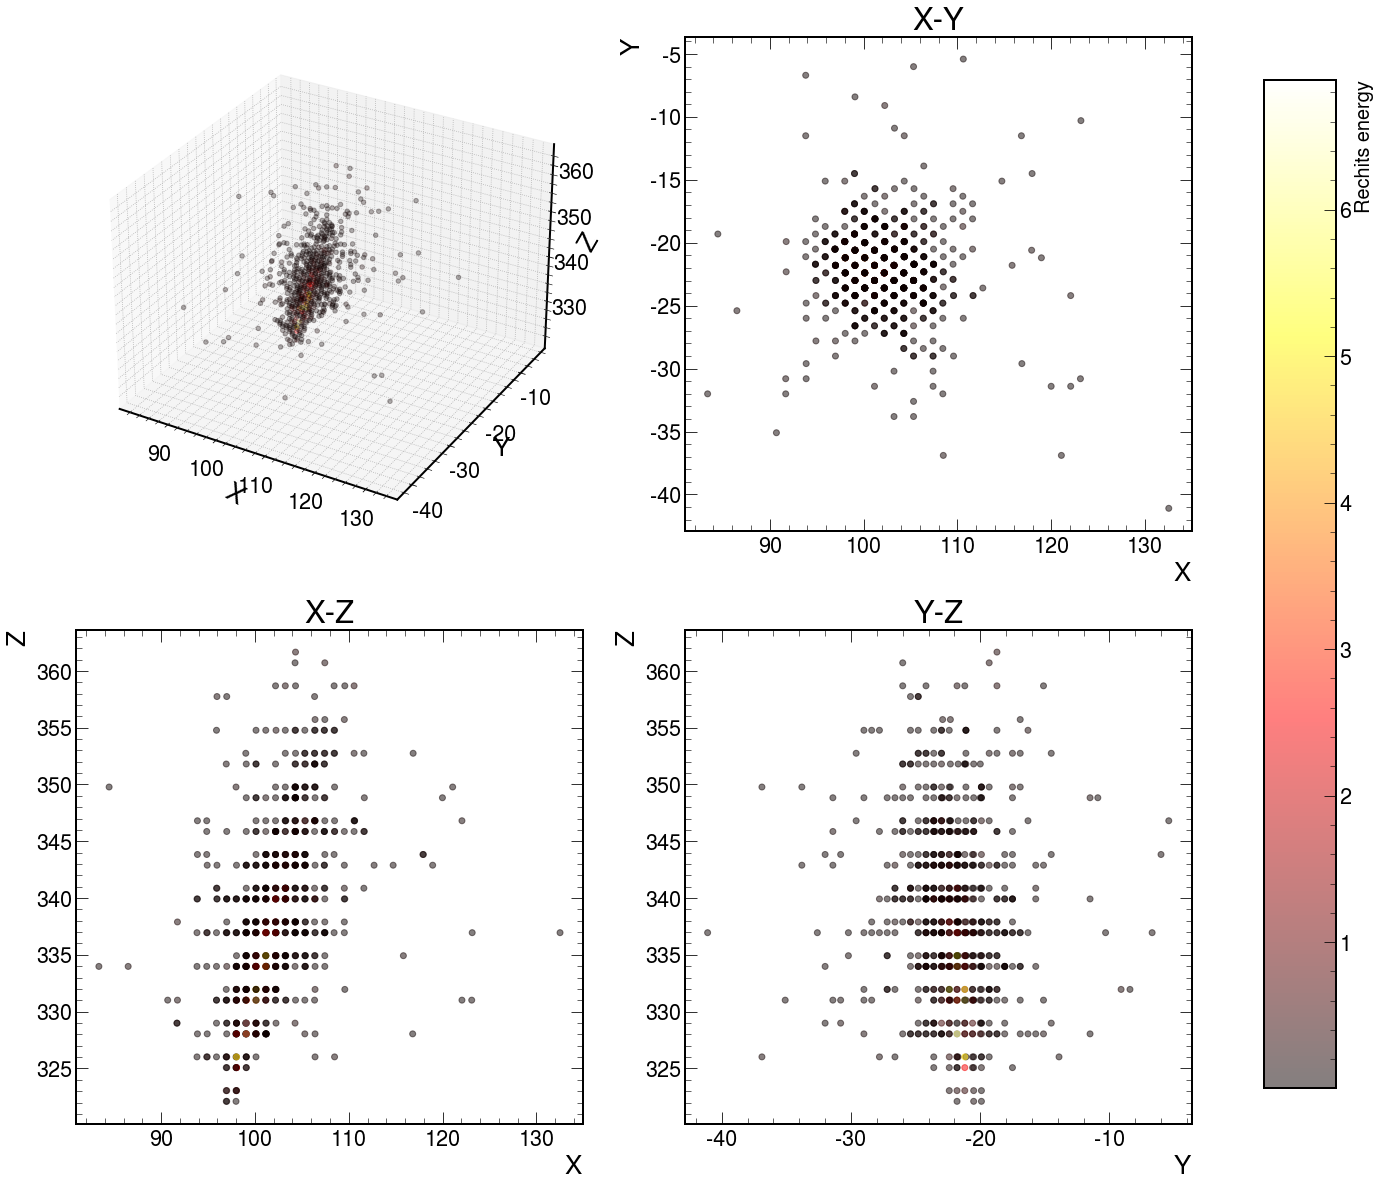

In [5]:
plots3DwithProjection(dataRH.values)

In [6]:
df = pd.read_csv("./postData/lc_df.csv")
# df = df.drop(df.columns[0], axis = 1)
event_number = 0
df_single_event = df[df.loc[:,"evt_id"] == event_number] #taking only one event
dataLC =df_single_event.iloc[:, 2:]

In [7]:
dataLC.head()

lc_x       lc_y        lc_z      lc_E  tot_energy
0  97.231628 -20.634317  322.102753  0.113793  115.688837
1  97.524605 -21.373190  323.047272  0.767417  115.688837
2  98.037209 -21.193907  325.072754  2.806177  115.688837
3  97.987213 -17.503754  325.072754  0.032355  115.688837
4  94.439842 -21.461588  326.017303  0.107175  115.688837

## Plotting Trackster's LayerClusters (each point is the barycenter of a layercluster)

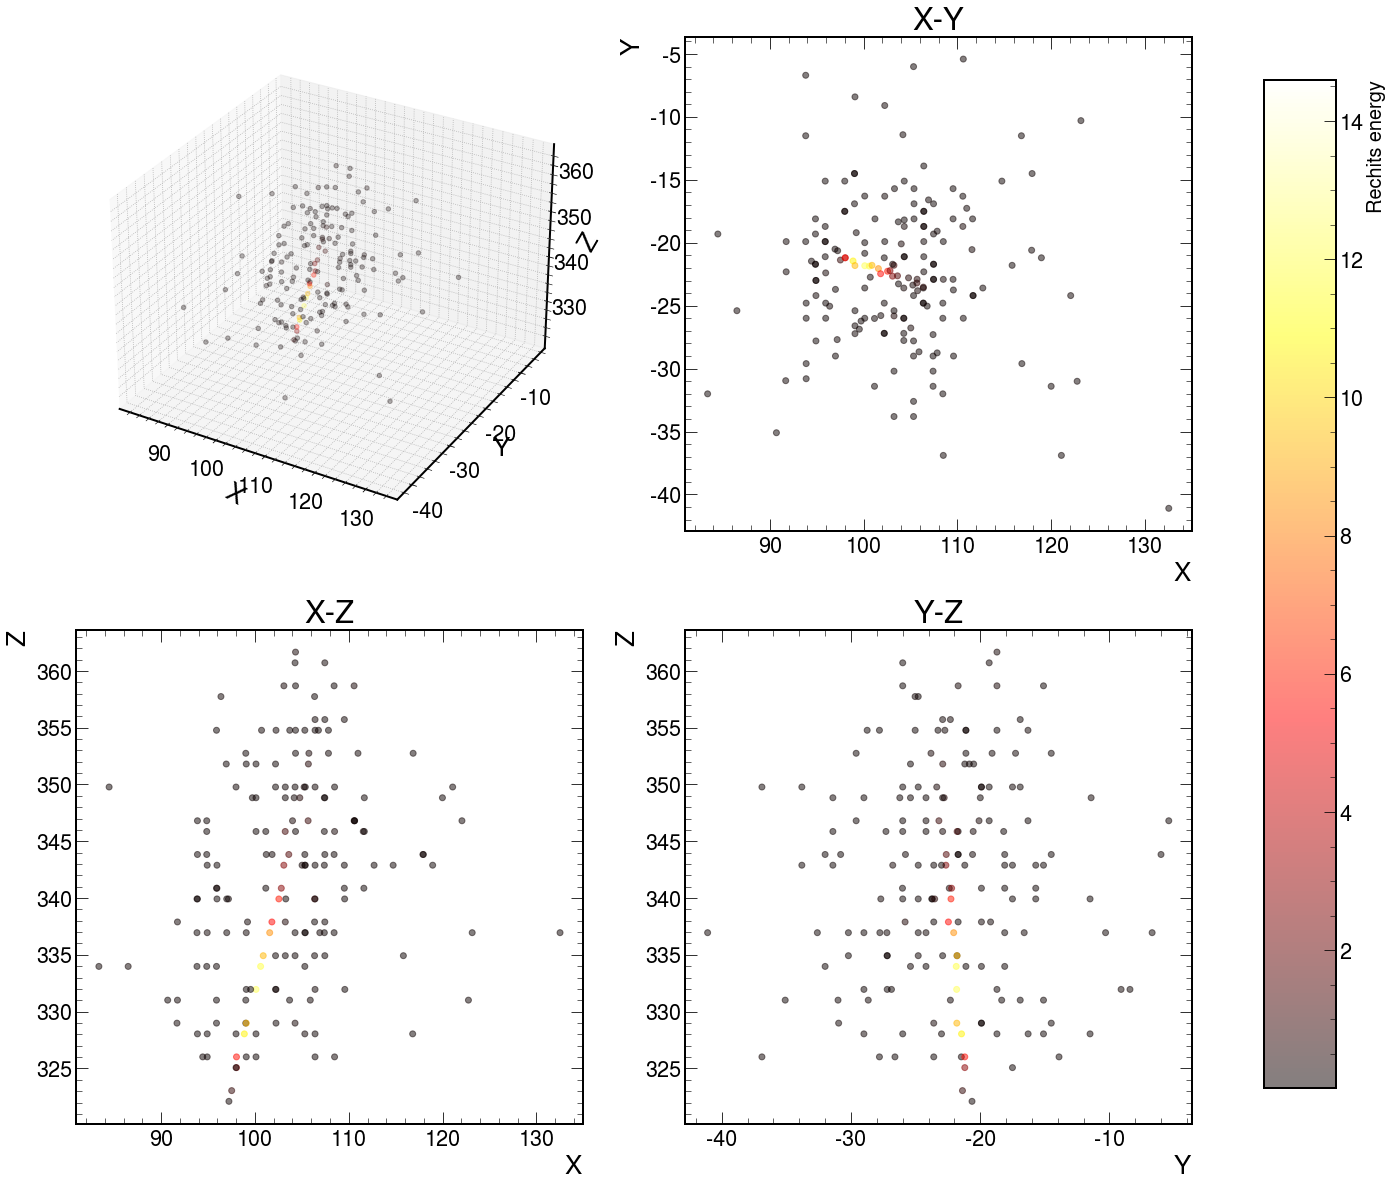

In [8]:
plots3DwithProjection(dataLC.values)

# Classic PCA - No reweighting - RecHits

In [9]:
dataRH.columns

Index(['rh_x', 'rh_y', 'rh_z', 'rh_E', 'fraction', 'tot_energy'], dtype='object')

In [10]:
pcaClassicRH, barycenterClassicRH = runPCA(3, dataRH.iloc[:, :3].values)

(3, 640)


In [11]:
pcaSummary(pcaClassicRH)
print(barycenterClassicRH)

Covariance Matrix 
 [[22.75201171 -1.49105335 15.17184665]
 [-1.49105335 13.45916864 -2.16732317]
 [15.17184665 -2.16732317 64.63311006]] 
 
Eigenvectors 
 [[ 0.30869381 -0.04482583  0.95010461]
 [ 0.93652112 -0.16025944 -0.31184148]
 [ 0.16624179  0.98605657 -0.00749076]] 

Eigenvalues 
 [69.66477403 17.95526374 13.22425264] 

[102.30118105411529, -22.194662328064442, 339.0695109844208]


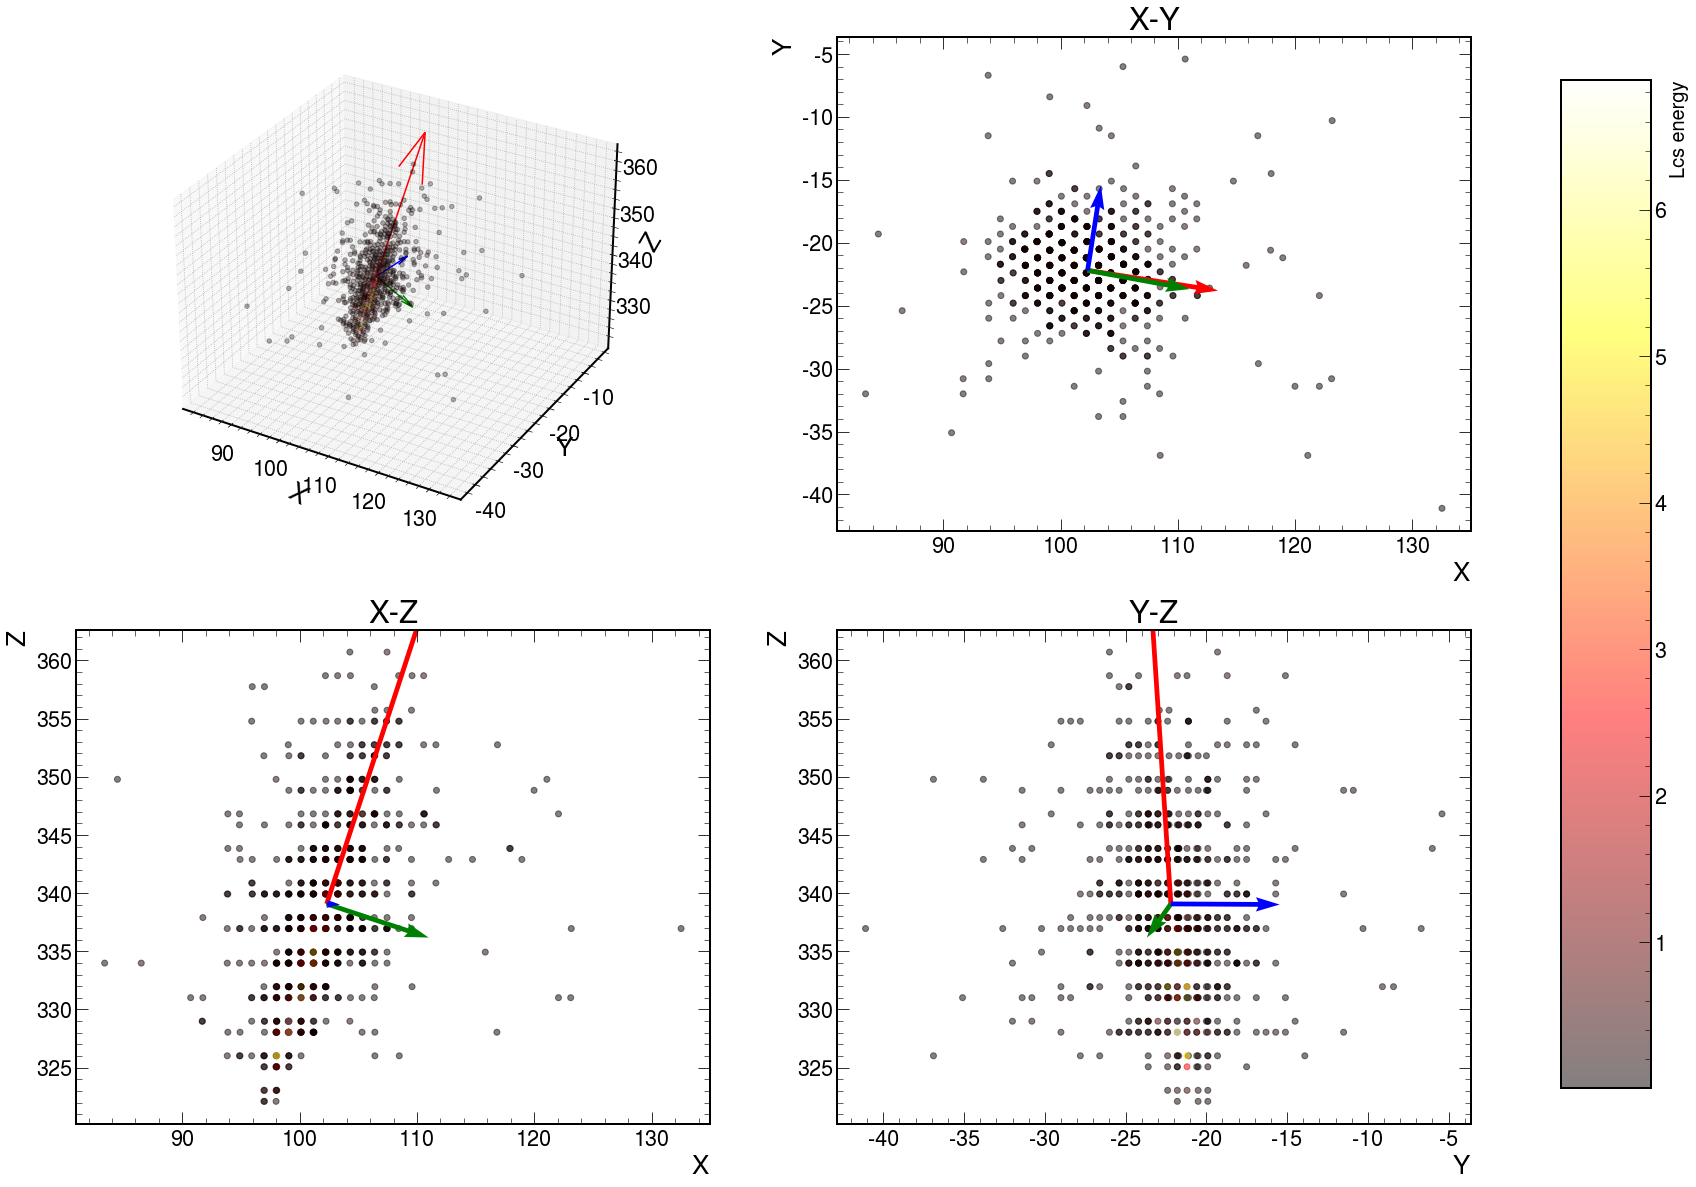

In [12]:
plots(dataRH.values, barycenterClassicRH, pcaClassicRH.components_, pcaClassicRH.explained_variance_, noise = 0, save = "Rechits_Noweight", arrow_scale = 6)

# Classic PCA - No reweighting - LayerClusters

In [13]:
dataLC.columns

Index(['lc_x', 'lc_y', 'lc_z', 'lc_E', 'tot_energy'], dtype='object')

In [14]:
pcaClassicLC, barycenterClassicLC = runPCA(3, dataLC.iloc[:, :3].values)

(3, 179)


In [15]:
pcaSummary(pcaClassicLC)

Covariance Matrix 
 [[52.61378557 -2.50267059 16.60726162]
 [-2.50267059 33.38246284  0.40321685]
 [16.60726162  0.40321685 89.27505113]] 
 
Eigenvectors 
 [[-0.36018357  0.00843134 -0.93284335]
 [ 0.91649912 -0.18337829 -0.35553027]
 [ 0.17406082  0.98300626 -0.05832254]] 

Eigenvalues 
 [95.6836974  46.6722101  32.91539205] 



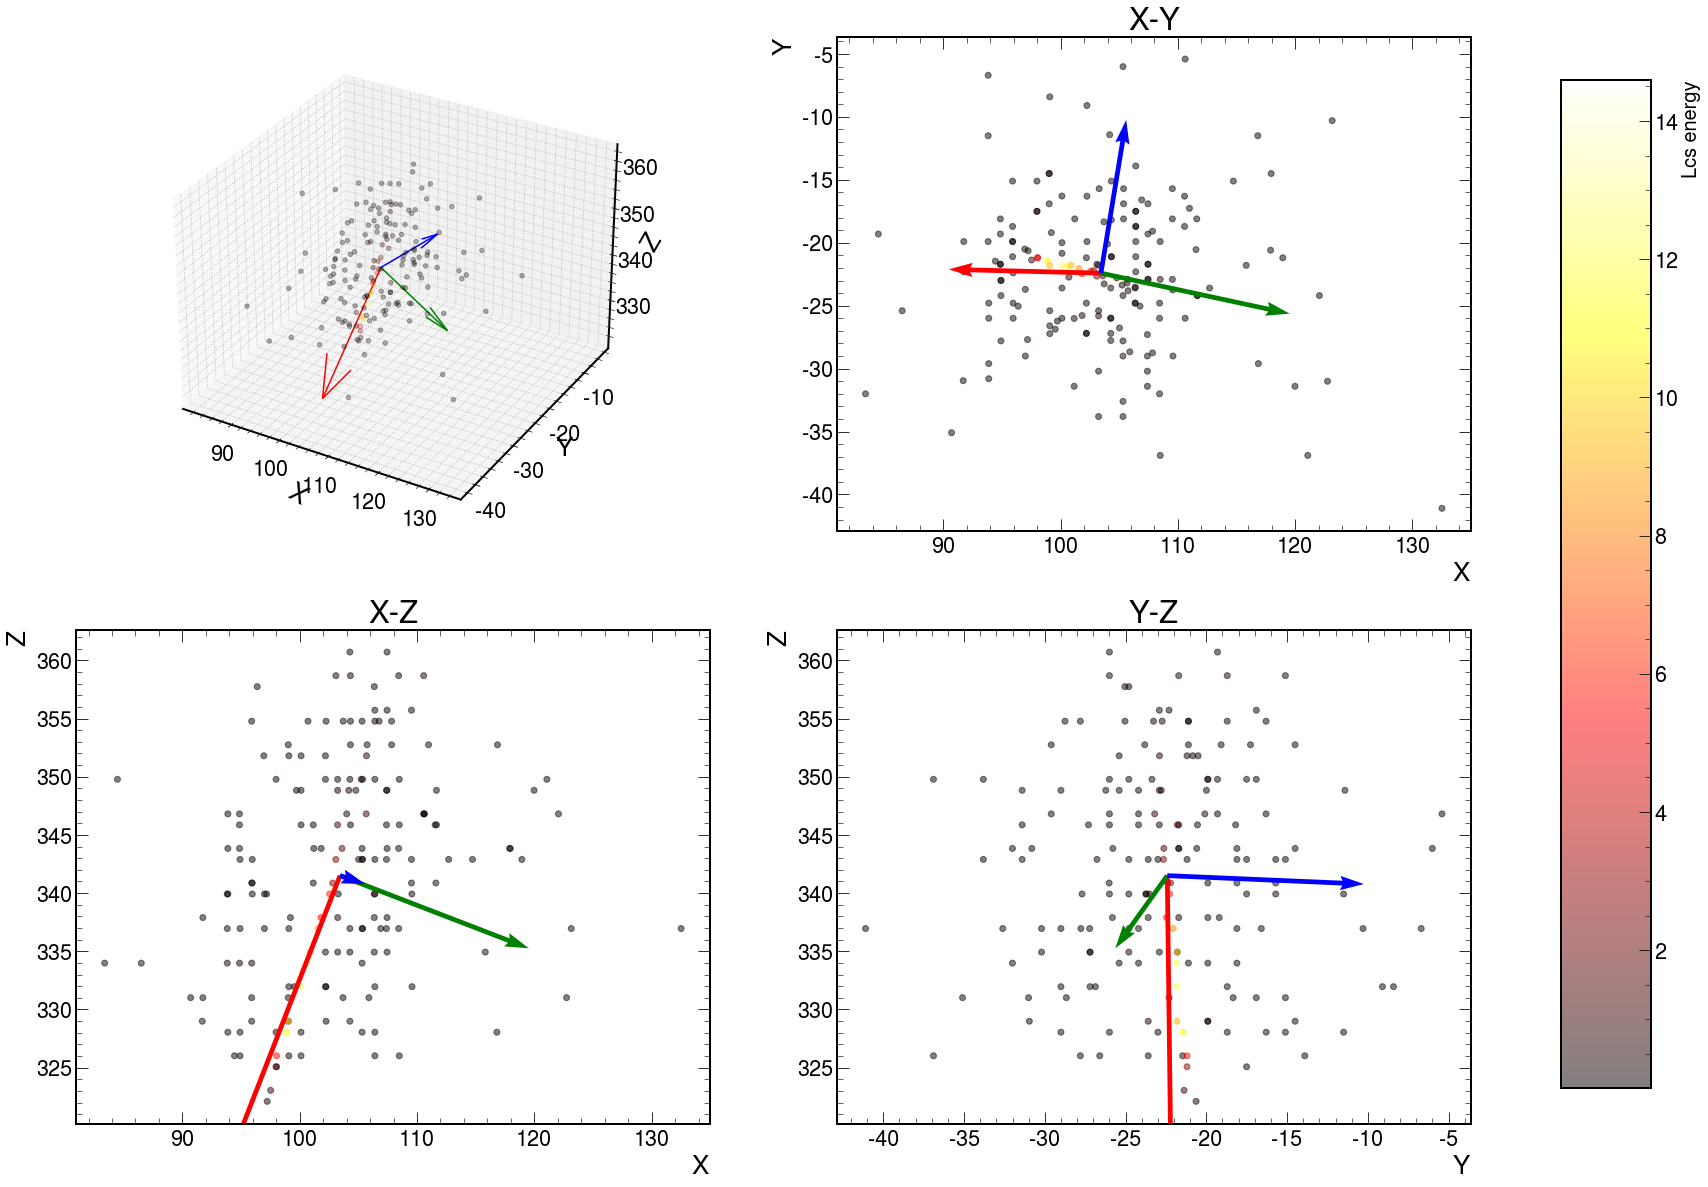

In [16]:
plots(dataLC.values, barycenterClassicLC, pcaClassicLC.components_, pcaClassicLC.explained_variance_, noise = 0, save = "LCS_Noweight", arrow_scale = 6)

# Comparison between the Principal Directions - RecHits vs LayerClusters

In [17]:
vec1_RH = pcaClassicRH.components_[0] #principal component PCA on RecHits
vec1_LC = pcaClassicLC.components_[0] #principal component PCA on RecHits
dot = vec1_RH.dot(vec1_LC)
print(f'Radians {m.acos(dot)}, {np.rad2deg(m.acos(dot))}')

Radians 3.076207423920491, 176.25370229745542


## Filtering both the datasets  by energy selection

In [18]:
dataRH_filtered = dataRH[dataRH.iloc[:, 3] > 0.2]
dataLC_filtered = dataLC[dataLC.iloc[:, 3] > 1]

#### RecHits

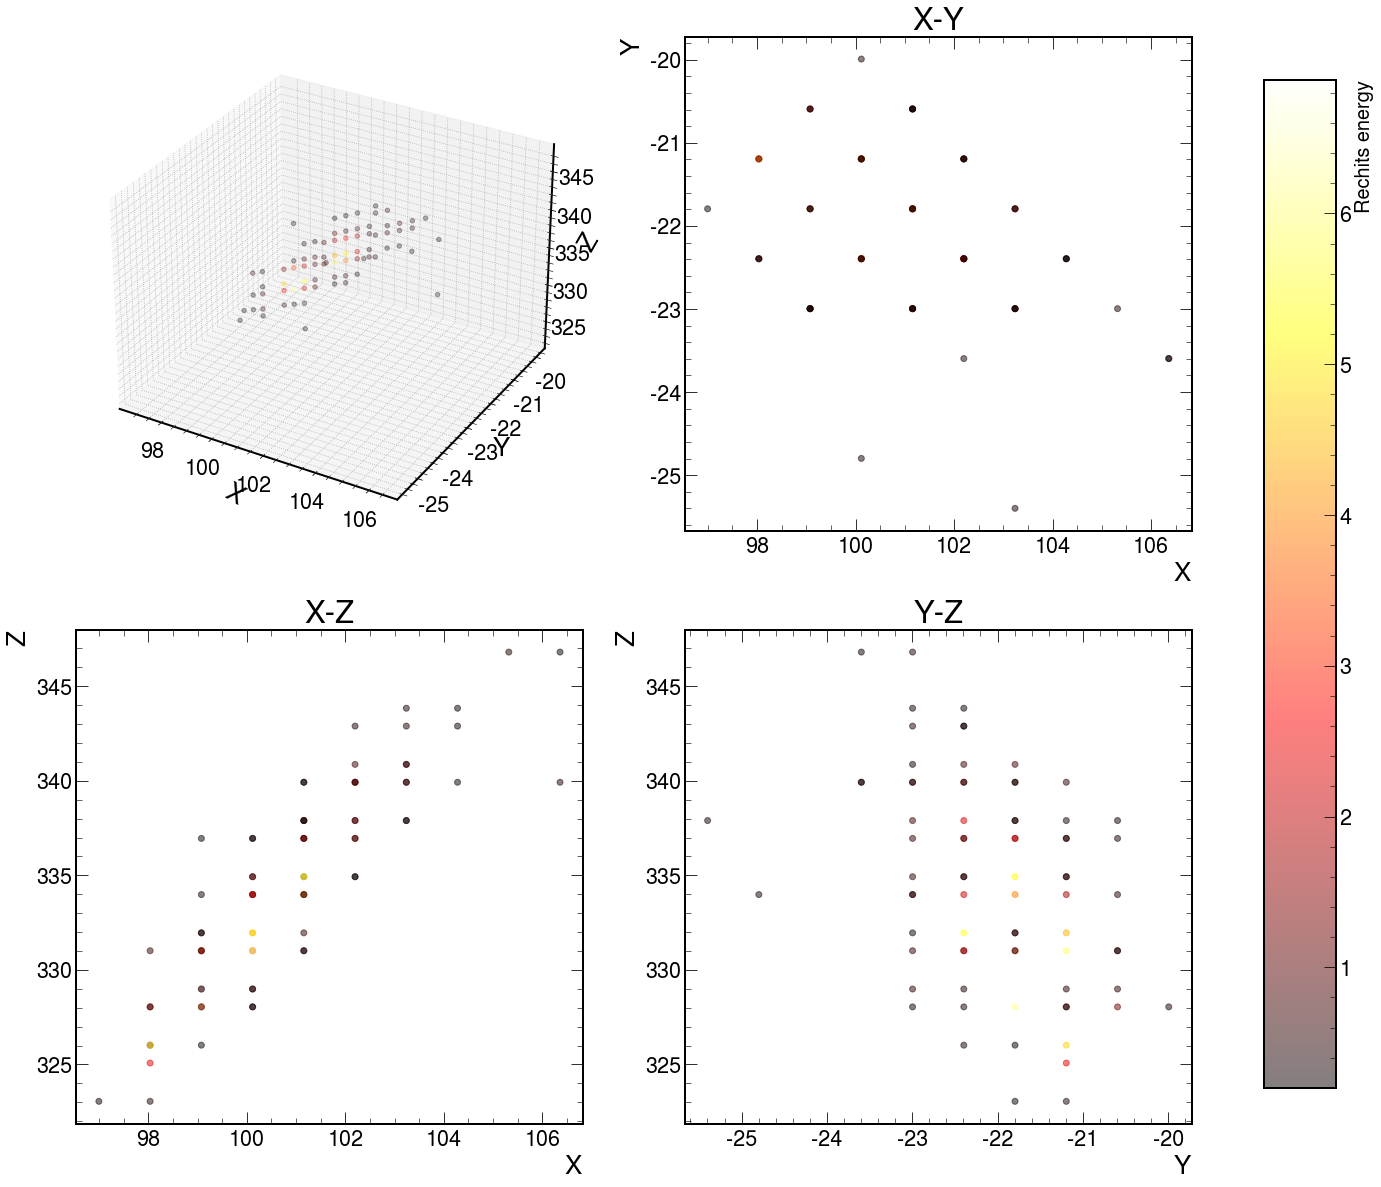

In [19]:
plots3DwithProjection(dataRH_filtered.values)

In [20]:
pcaClassicRHFilter, barycenterClassicRHFilter = runPCA(3, dataRH_filtered.iloc[:, :3].values)
pcaSummary(pcaClassicRHFilter)
print(barycenterClassicRHFilter)

(3, 78)
Covariance Matrix 
 [[ 3.96096234 -0.66783383  9.52747957]
 [-0.66783383  0.94339598 -2.03662082]
 [ 9.52747957 -2.03662082 30.47488828]] 
 
Eigenvectors 
 [[ 0.3059256  -0.06532364  0.94981175]
 [ 0.94207117 -0.12333334 -0.31191472]
 [-0.13751886 -0.99021296 -0.02380869]] 

Eigenvalues 
 [33.68367083  0.89389579  0.80167998] 

[100.91792199550531, -22.071694545256786, 334.59695317195013]


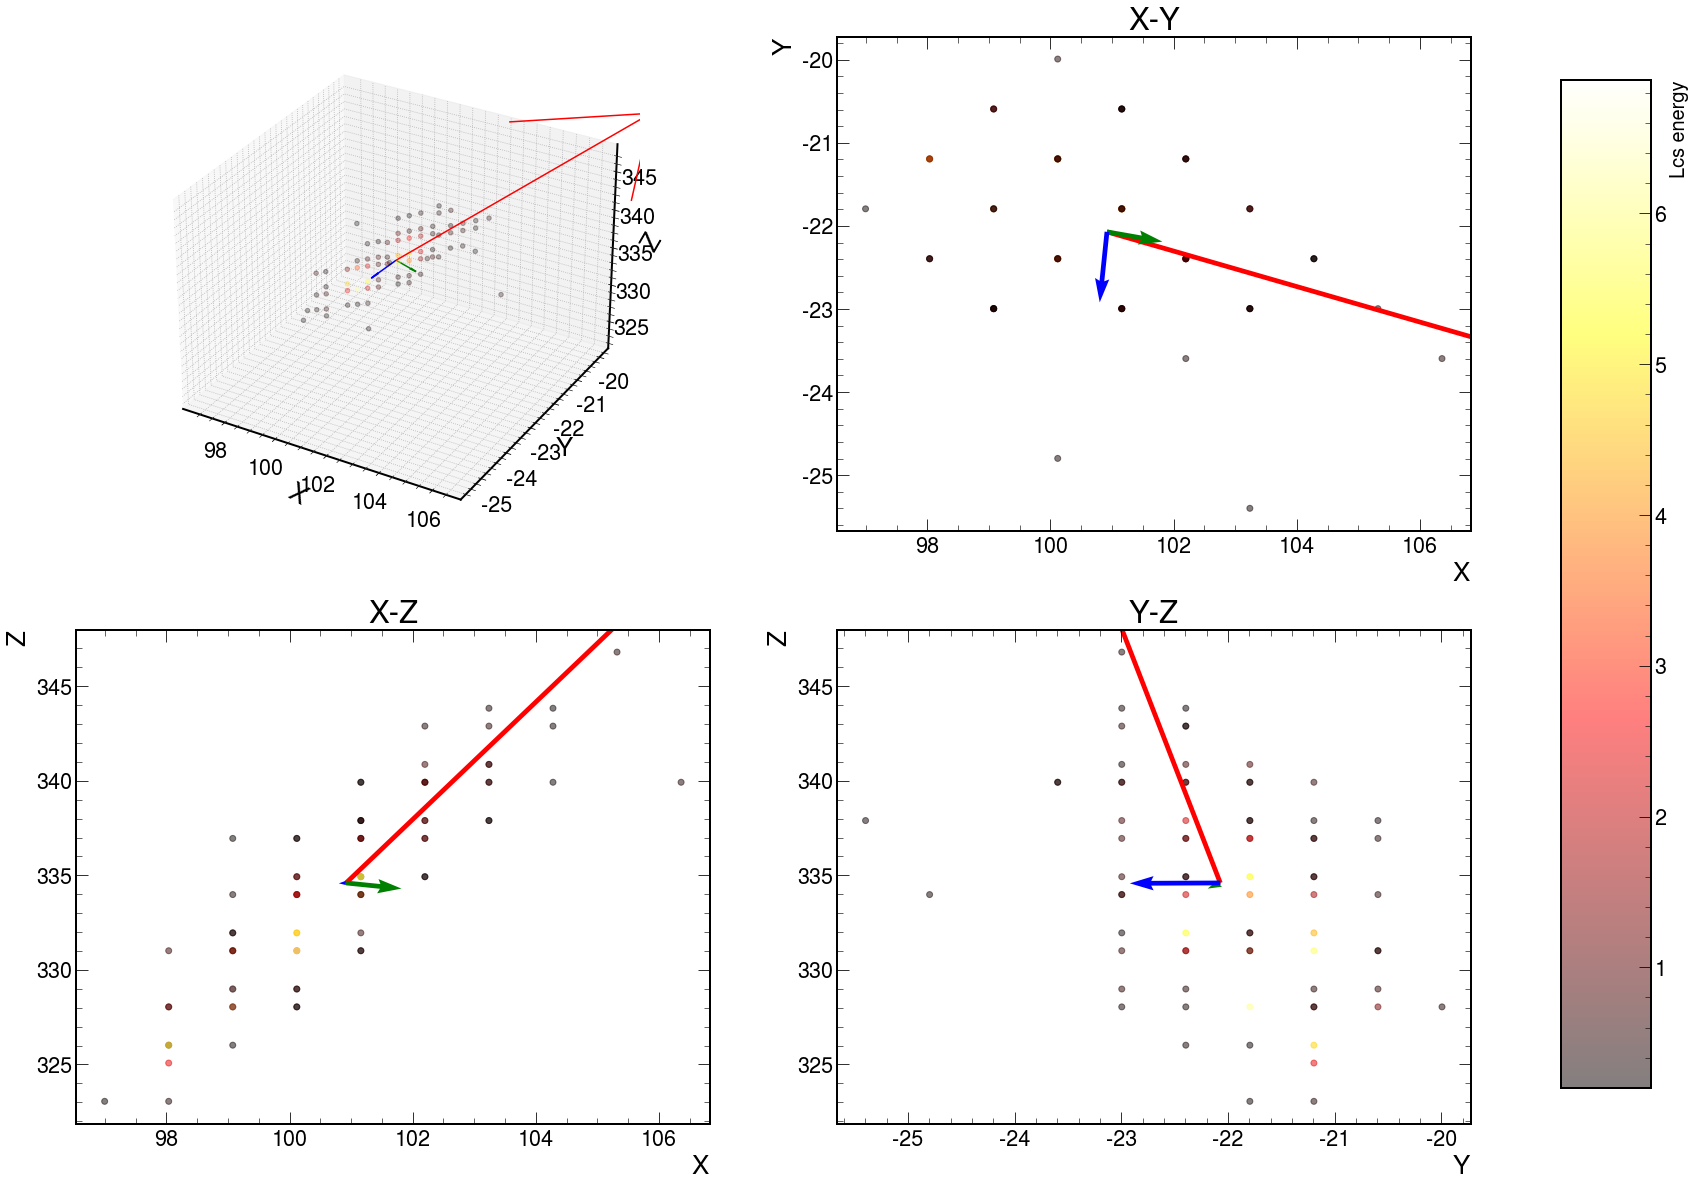

In [21]:
plots(dataRH_filtered.values, barycenterClassicRHFilter, pcaClassicRHFilter.components_, pcaClassicRHFilter.explained_variance_, noise = 0, save = "RHS_Noweight_filtered", arrow_scale = 6)

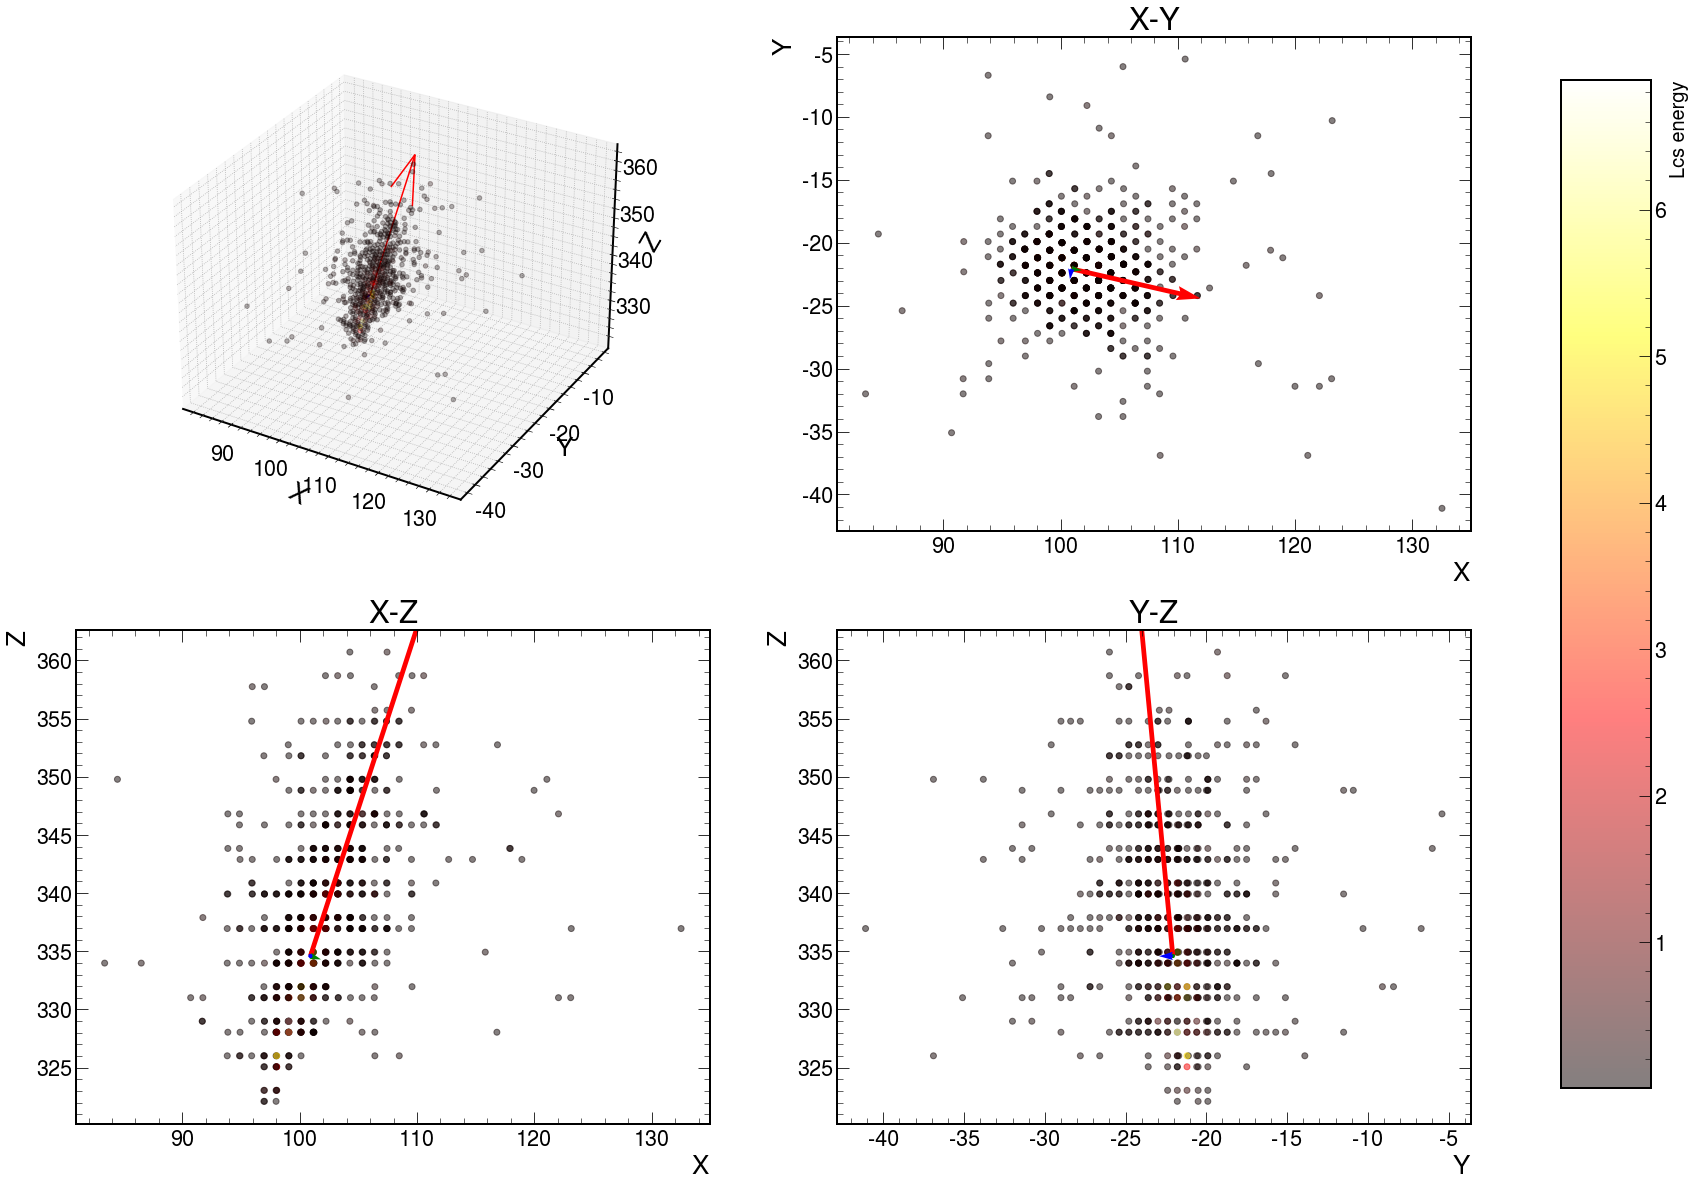

In [22]:
plots(dataRH.values, barycenterClassicRHFilter, pcaClassicRHFilter.components_, pcaClassicRHFilter.explained_variance_, noise = 0, save = "RHS_Noweight_filtered_total", arrow_scale = 6)

### Layerclusters

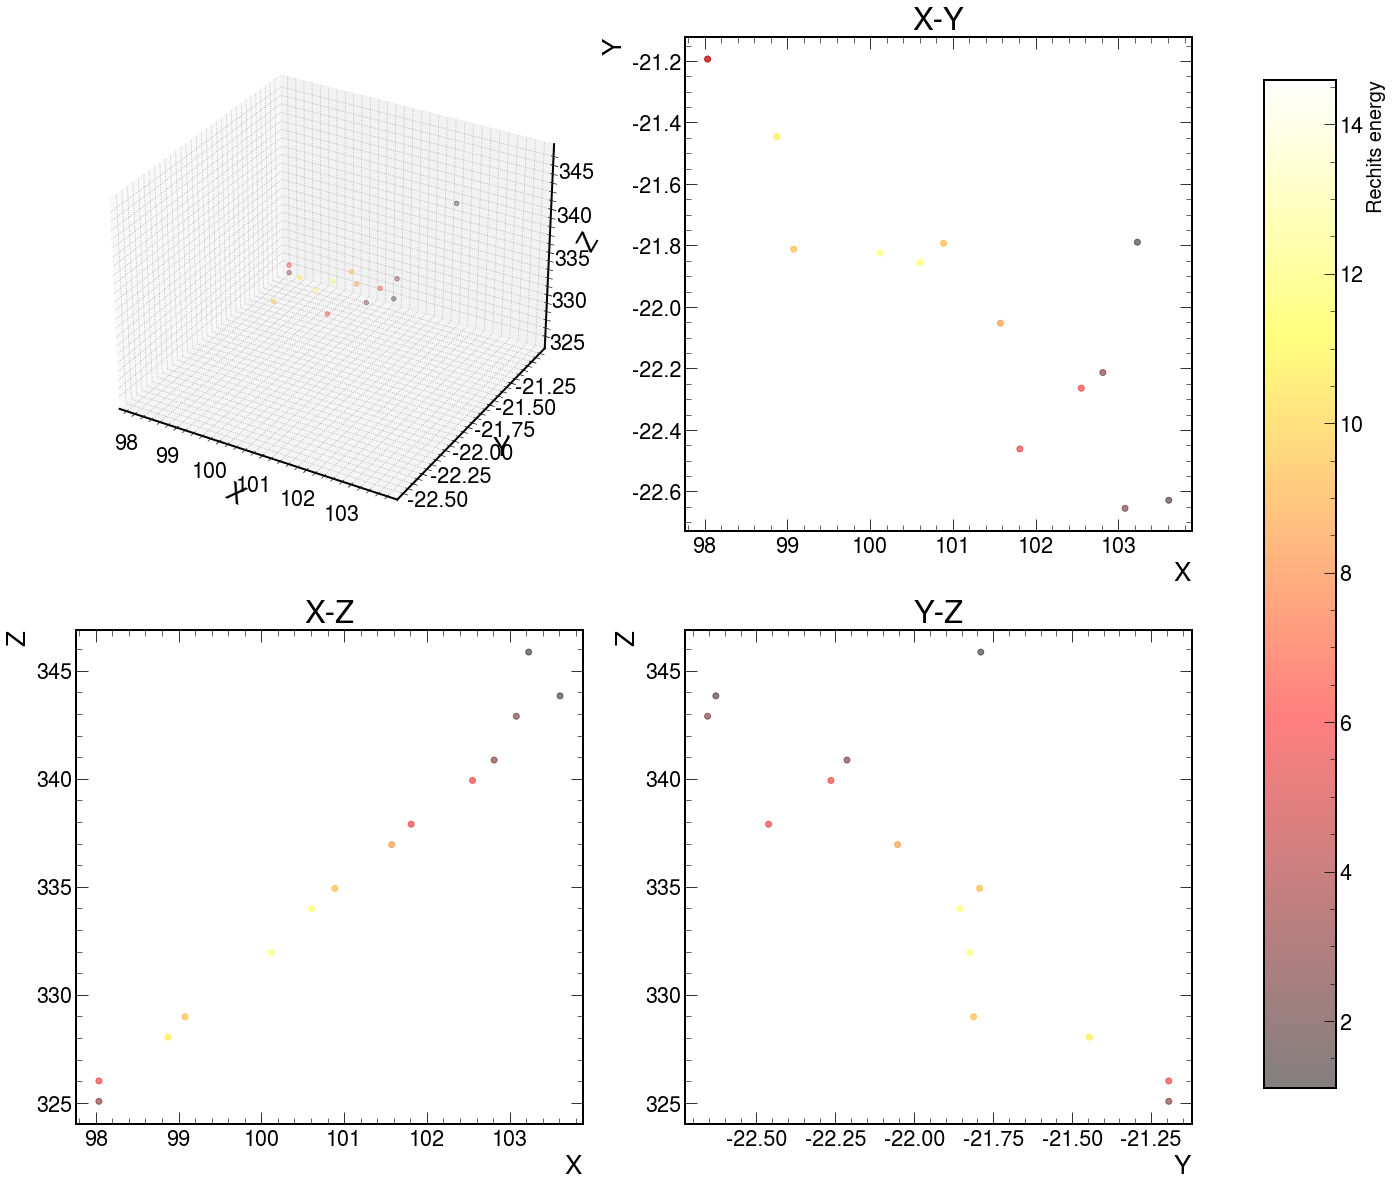

In [23]:
plots3DwithProjection(dataLC_filtered.values)

In [24]:
pcaClassicLCFilter, barycenterClassicLCFilter = runPCA(3, dataLC_filtered.iloc[:, :3].values)
pcaSummary(pcaClassicLCFilter)

(3, 15)
Covariance Matrix 
 [[ 3.63838611 -0.7598577  12.56948878]
 [-0.7598577   0.2118879  -2.49934097]
 [12.56948878 -2.49934097 44.1823636 ]] 
 
Eigenvectors 
 [[ 0.27360548 -0.05468148  0.9602864 ]
 [-0.62695801  0.7469991   0.22116961]
 [-0.72942696 -0.66257247  0.17010005]] 

Eigenvalues 
 [4.79059909e+01 1.09639592e-01 1.70070866e-02] 



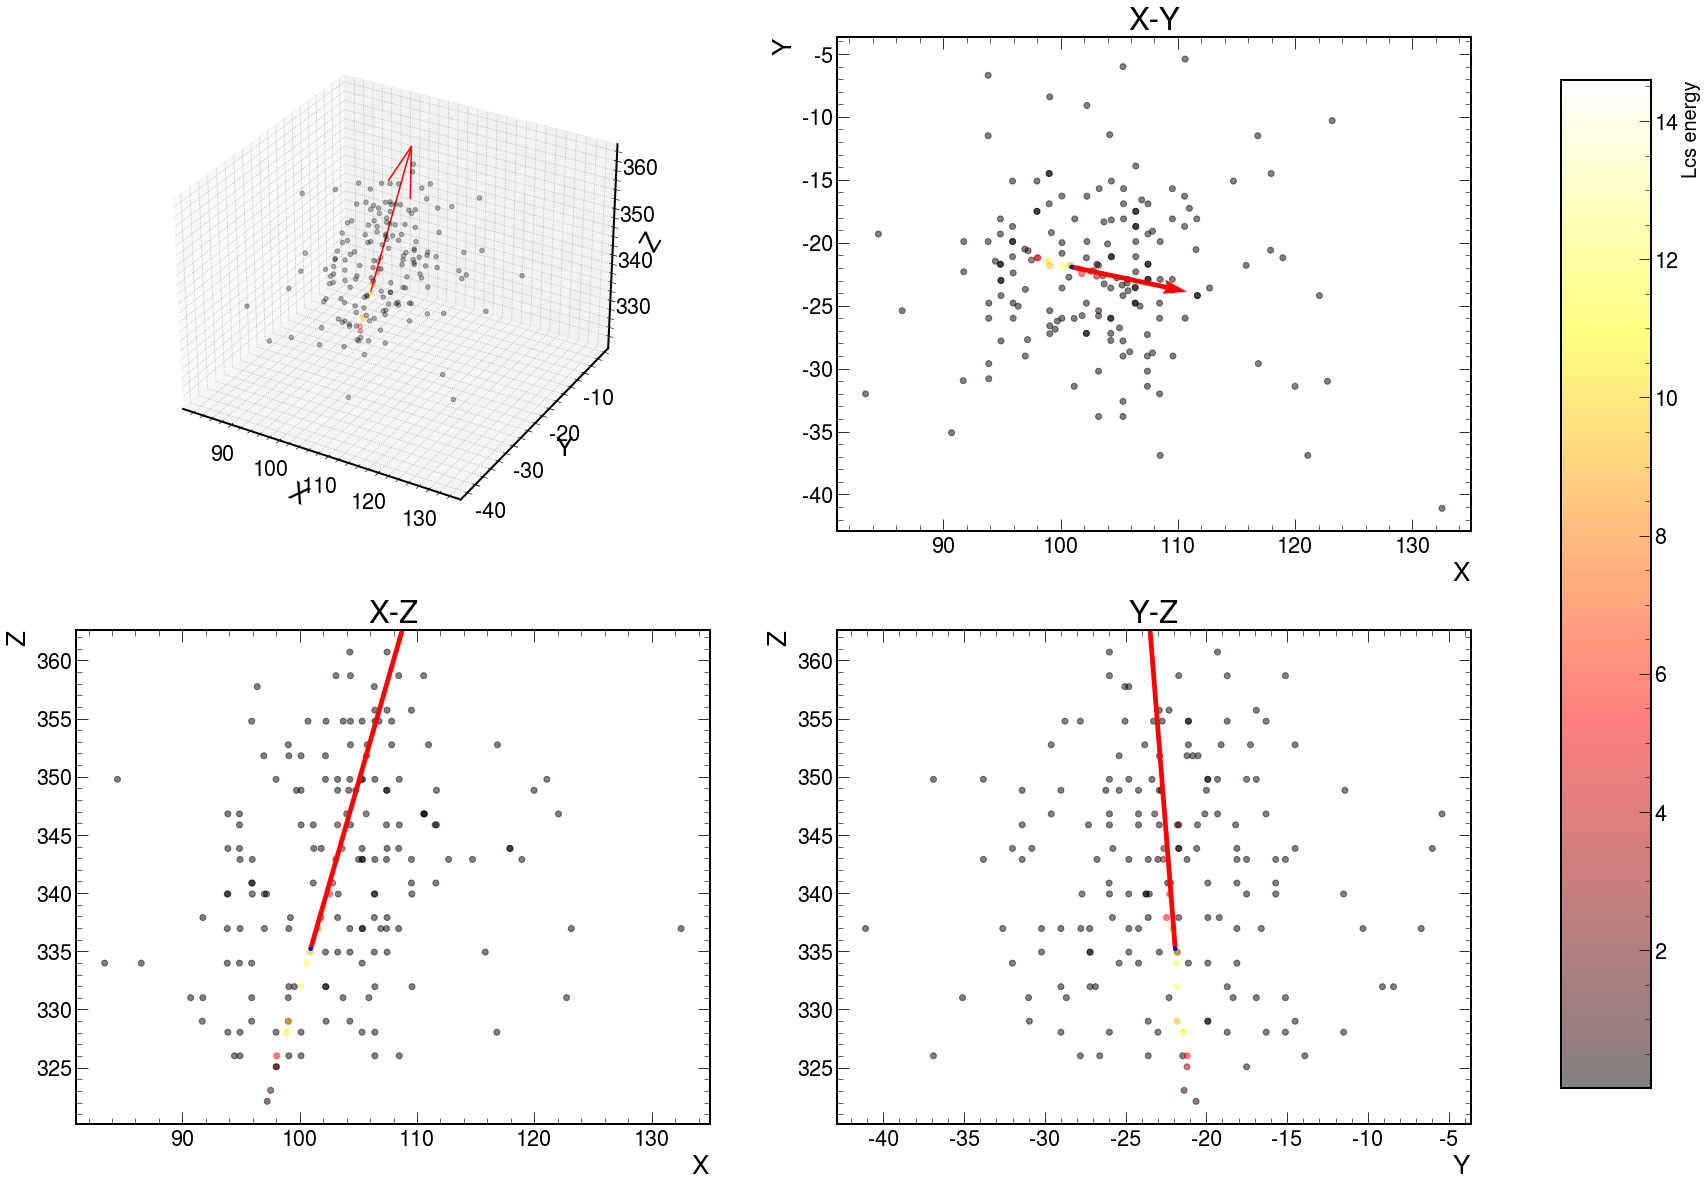

In [25]:
plots(dataLC.values, barycenterClassicLCFilter, pcaClassicLCFilter.components_, pcaClassicLCFilter.explained_variance_, noise = 0, save = "LCS_Noweight_filtered", arrow_scale = 6)

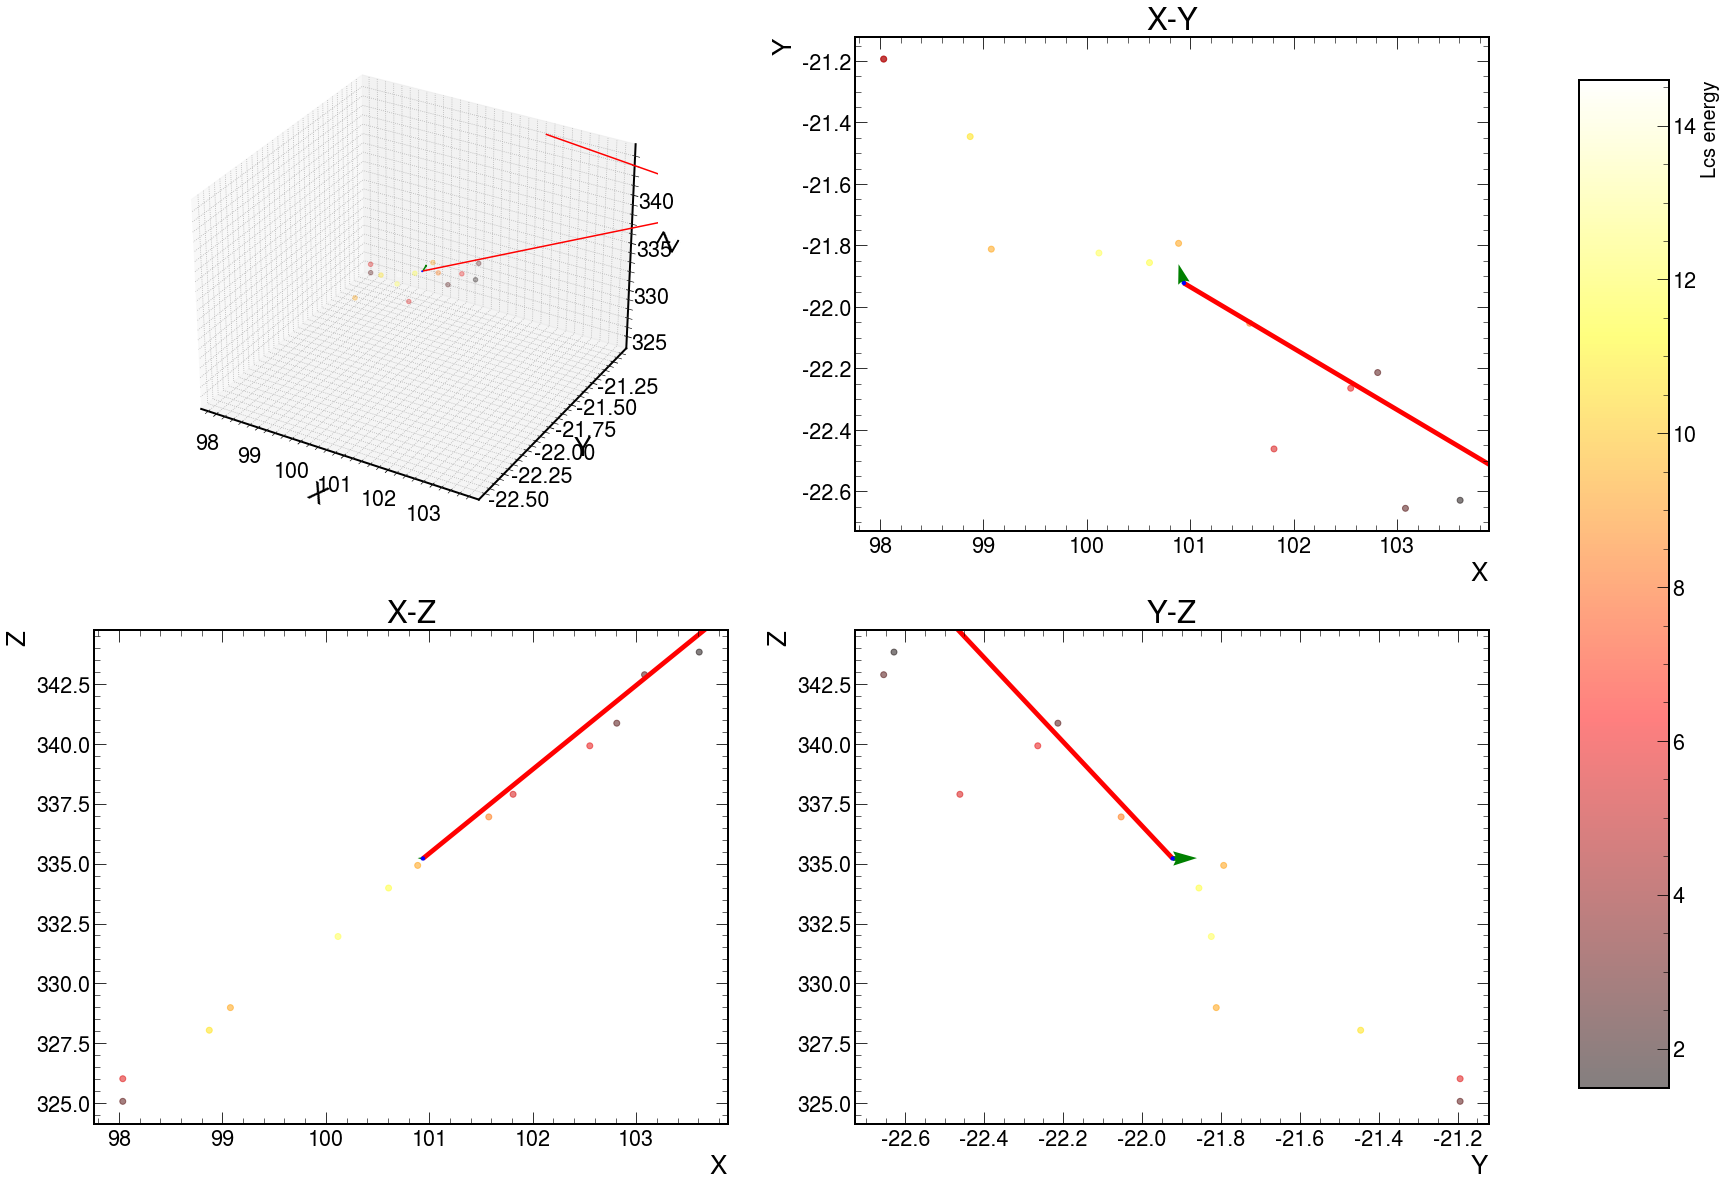

In [26]:
plots(dataLC_filtered.values, barycenterClassicLCFilter, pcaClassicLCFilter.components_, pcaClassicLCFilter.explained_variance_, noise = 0, save = "LCS_Noweight_filtered_total", arrow_scale = 6)

## Comparison 

In [27]:
vec1_RHFiltered = pcaClassicRHFilter.components_[0]
vec1_LCFiltered = pcaClassicLCFilter.components_[0]
dot = vec1_RHFiltered.dot(vec1_LC)
print(f'Radians {m.acos(dot)}, {np.rad2deg(m.acos(dot))}')

Radians 3.0611434308500645, 175.39059907190565


# Weighted PCA - Rechits

In [28]:
dataRH.columns

Index(['rh_x', 'rh_y', 'rh_z', 'rh_E', 'fraction', 'tot_energy'], dtype='object')

In [29]:
e_vecWRH, e_valWRH, covMWRH, covMRH, barycenterWRH = runWPCA(3, dataRH.iloc[:, :3].values, dataRH.iloc[:,3].values, dataRH.iloc[:,3].values.sum())

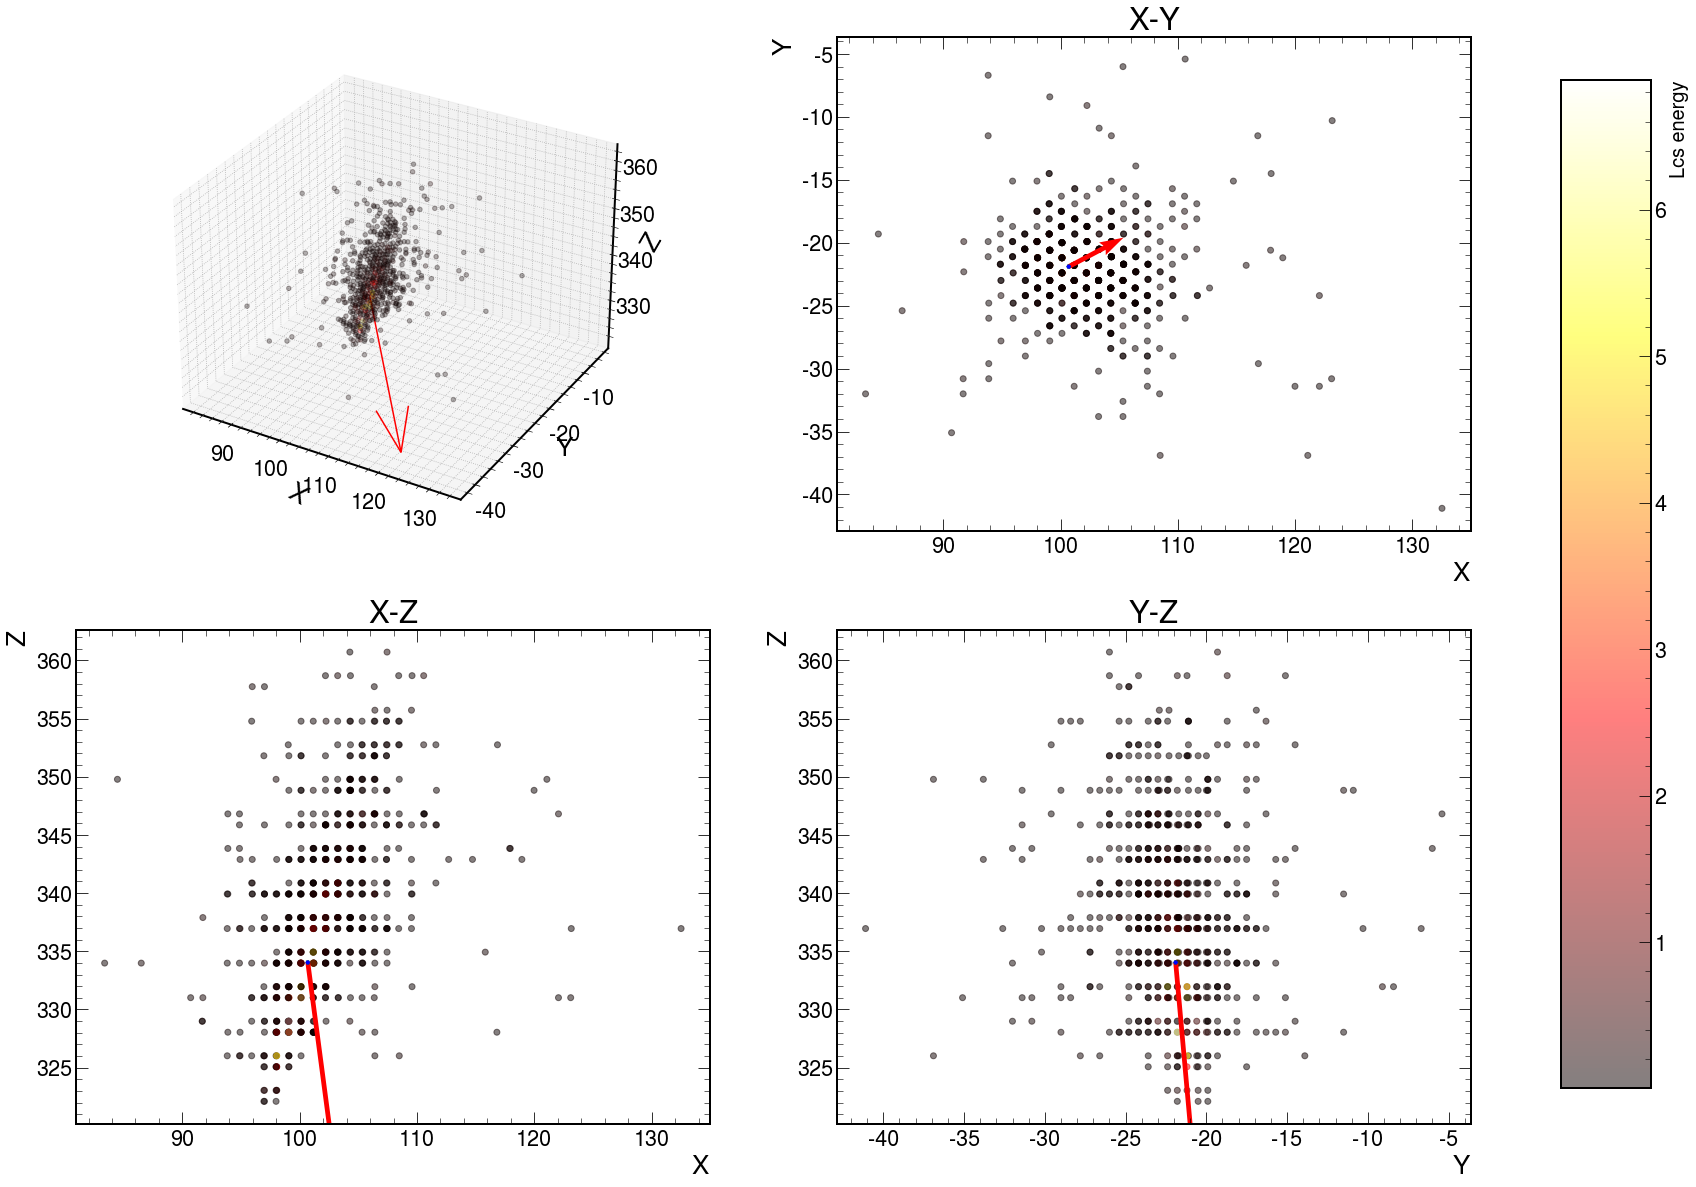

In [30]:
plots(dataRH.values, barycenterWRH, e_vecWRH, e_valWRH, noise = 0, save = "RH_Weighted", arrow_scale = 6)

# Weighted PCA - Layer Clusters

In [31]:
dataLC.columns

Index(['lc_x', 'lc_y', 'lc_z', 'lc_E', 'tot_energy'], dtype='object')

In [32]:
e_vecWLC, e_valWLC, covMWLC, covMLC, barycenterWLC = runWPCA(3, dataLC.iloc[:, :3].values, dataLC.iloc[:,3].values, dataLC.iloc[:,3].values.sum())

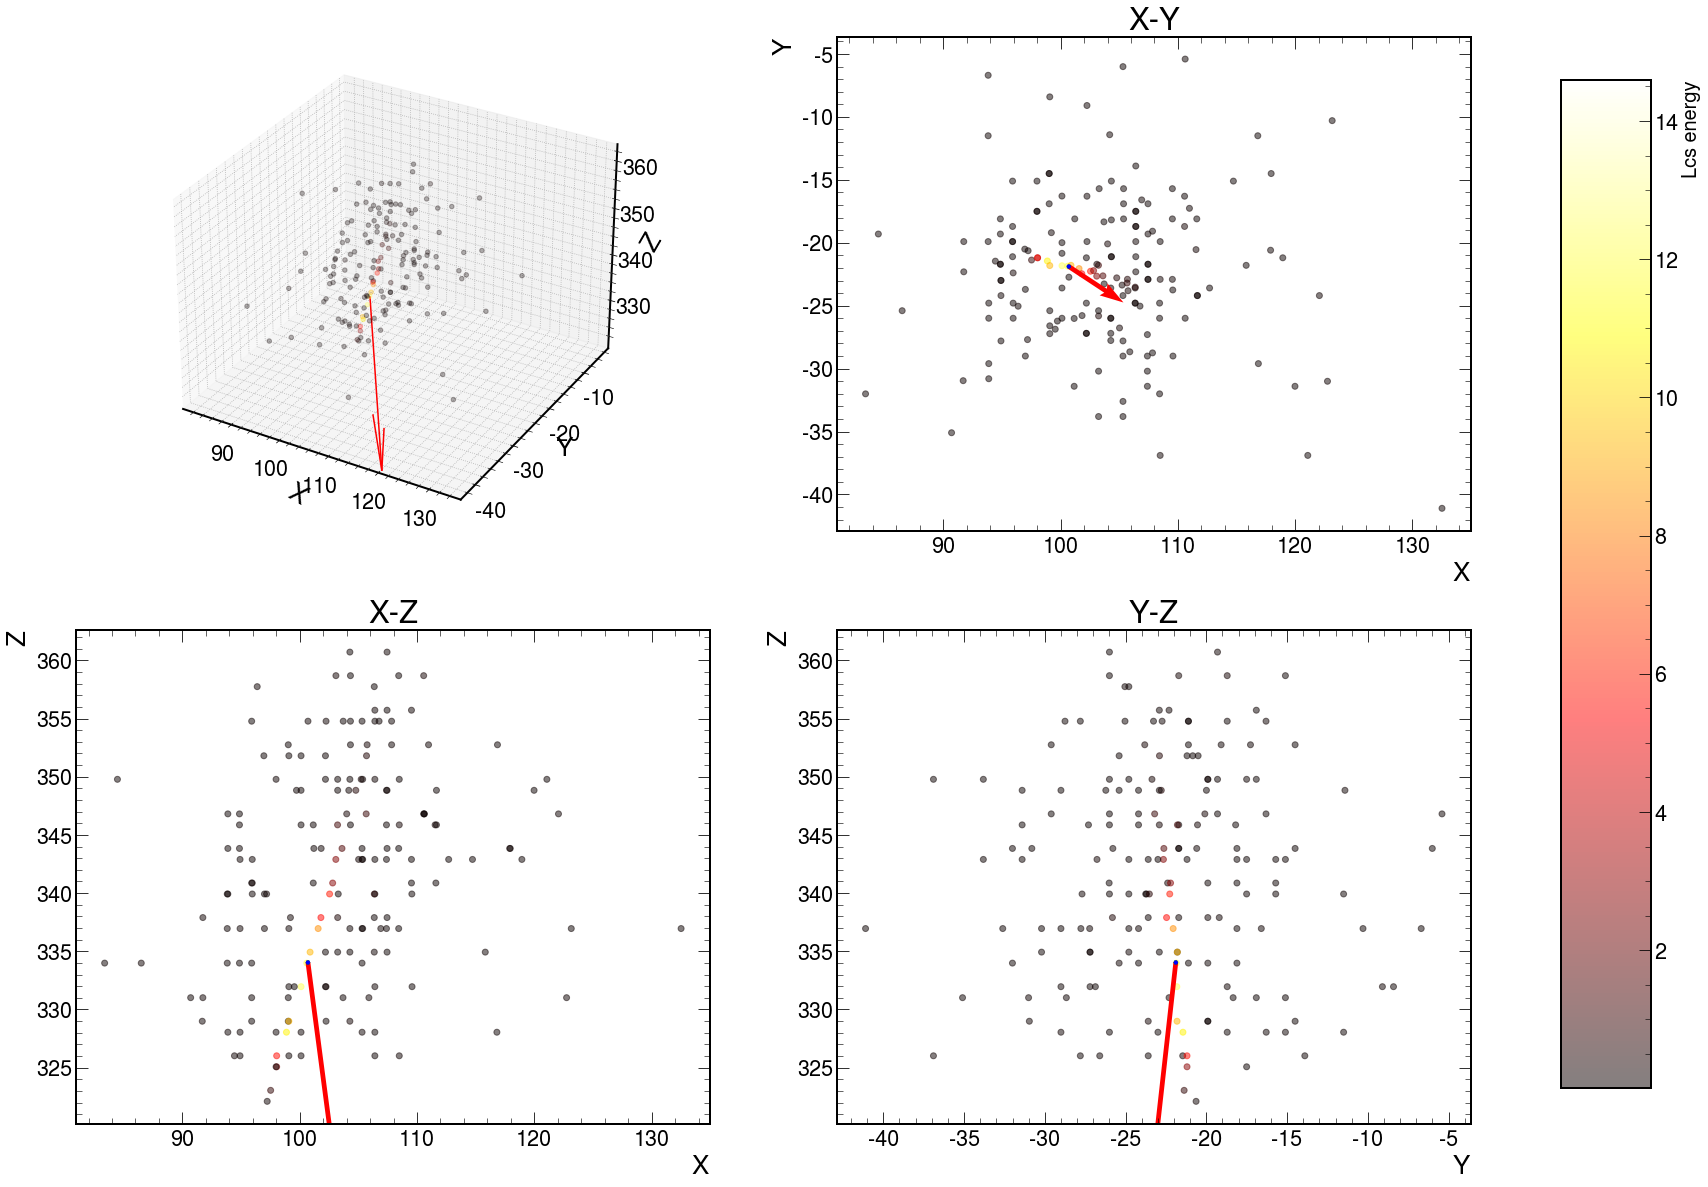

In [33]:
plots(dataLC.values, barycenterWLC, e_vecWLC, e_valWLC, noise = 0, save = "LCS_Weighted", arrow_scale = 6)

# Filtering

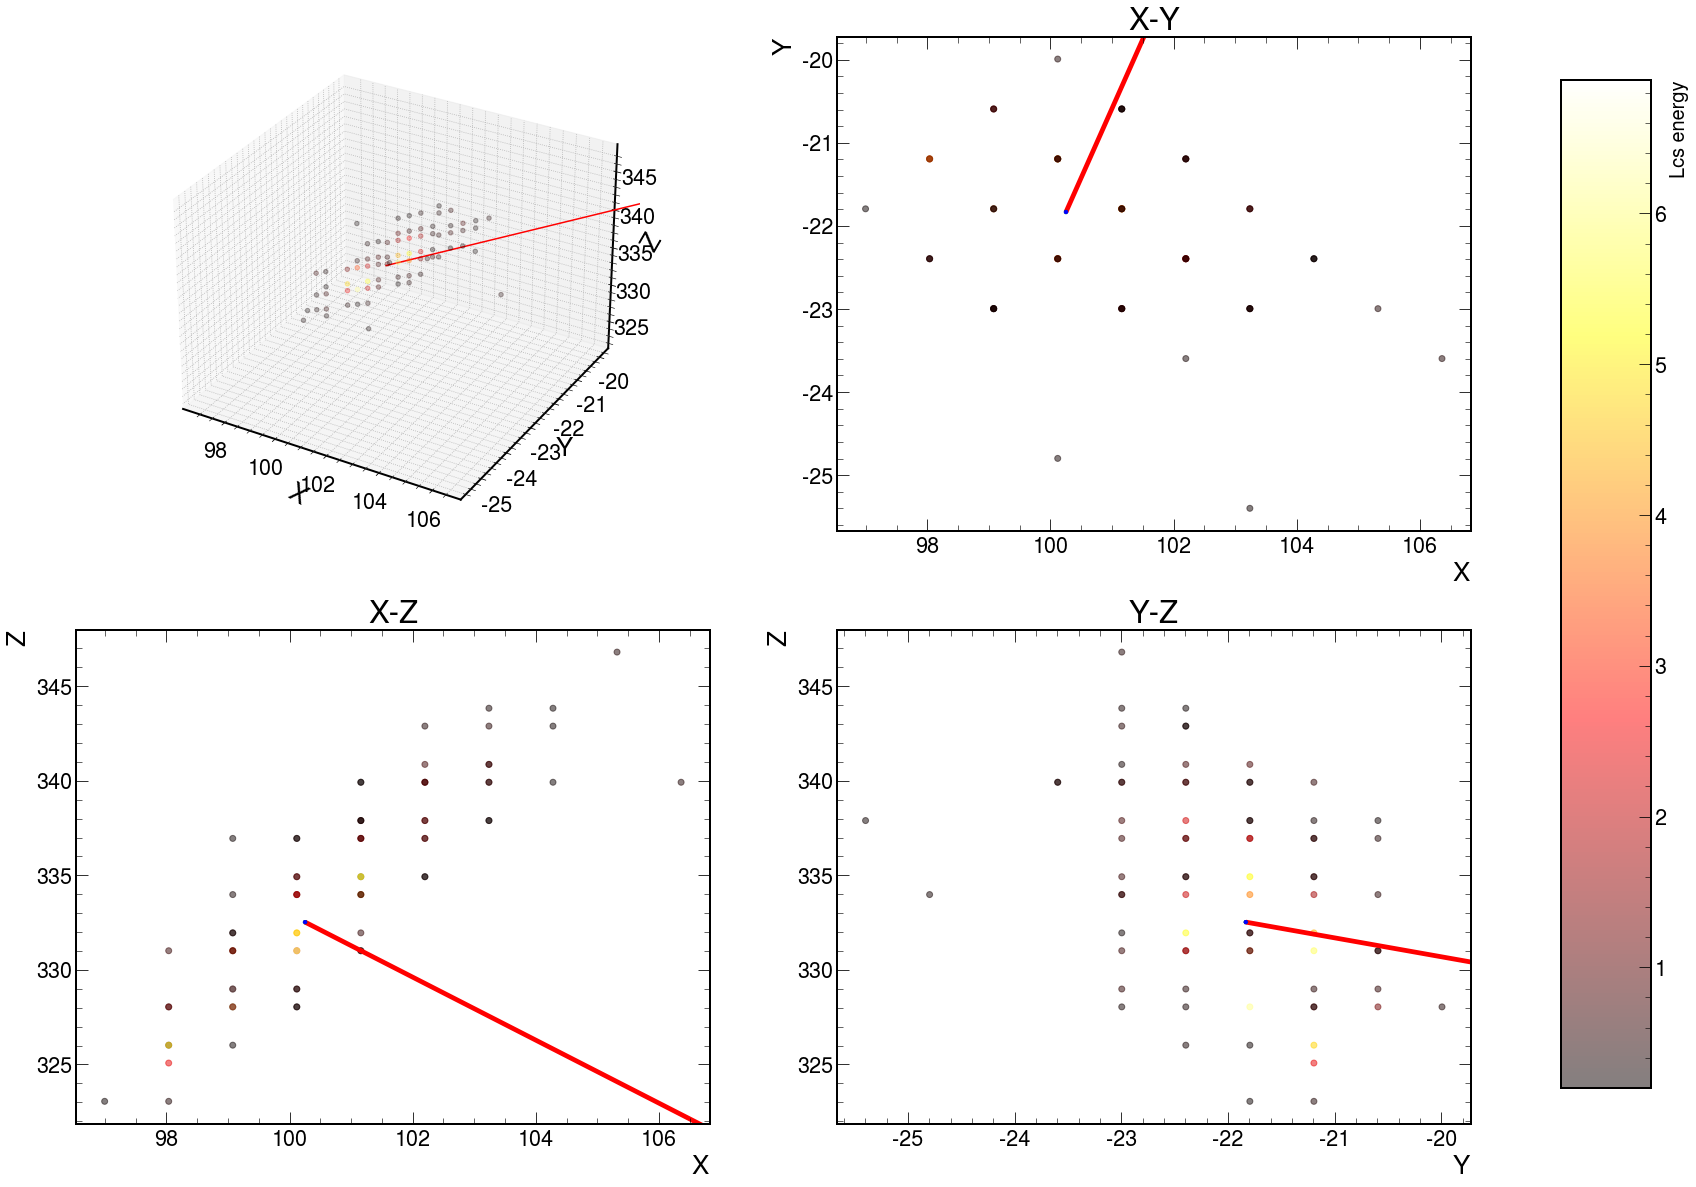

In [34]:
e_vecWRHF, e_valWRHF, covMWRHF, covMRHF, barycenterWRHF = runWPCA(3, dataRH_filtered.iloc[:, :3].values, dataRH_filtered.iloc[:,3].values, dataRH.iloc[:,3].values.sum())
plots(dataRH_filtered.values, barycenterWRHF, e_vecWRHF, e_valWRHF, noise = 0, save = "RH_Weighted_Filtered", arrow_scale = 6)

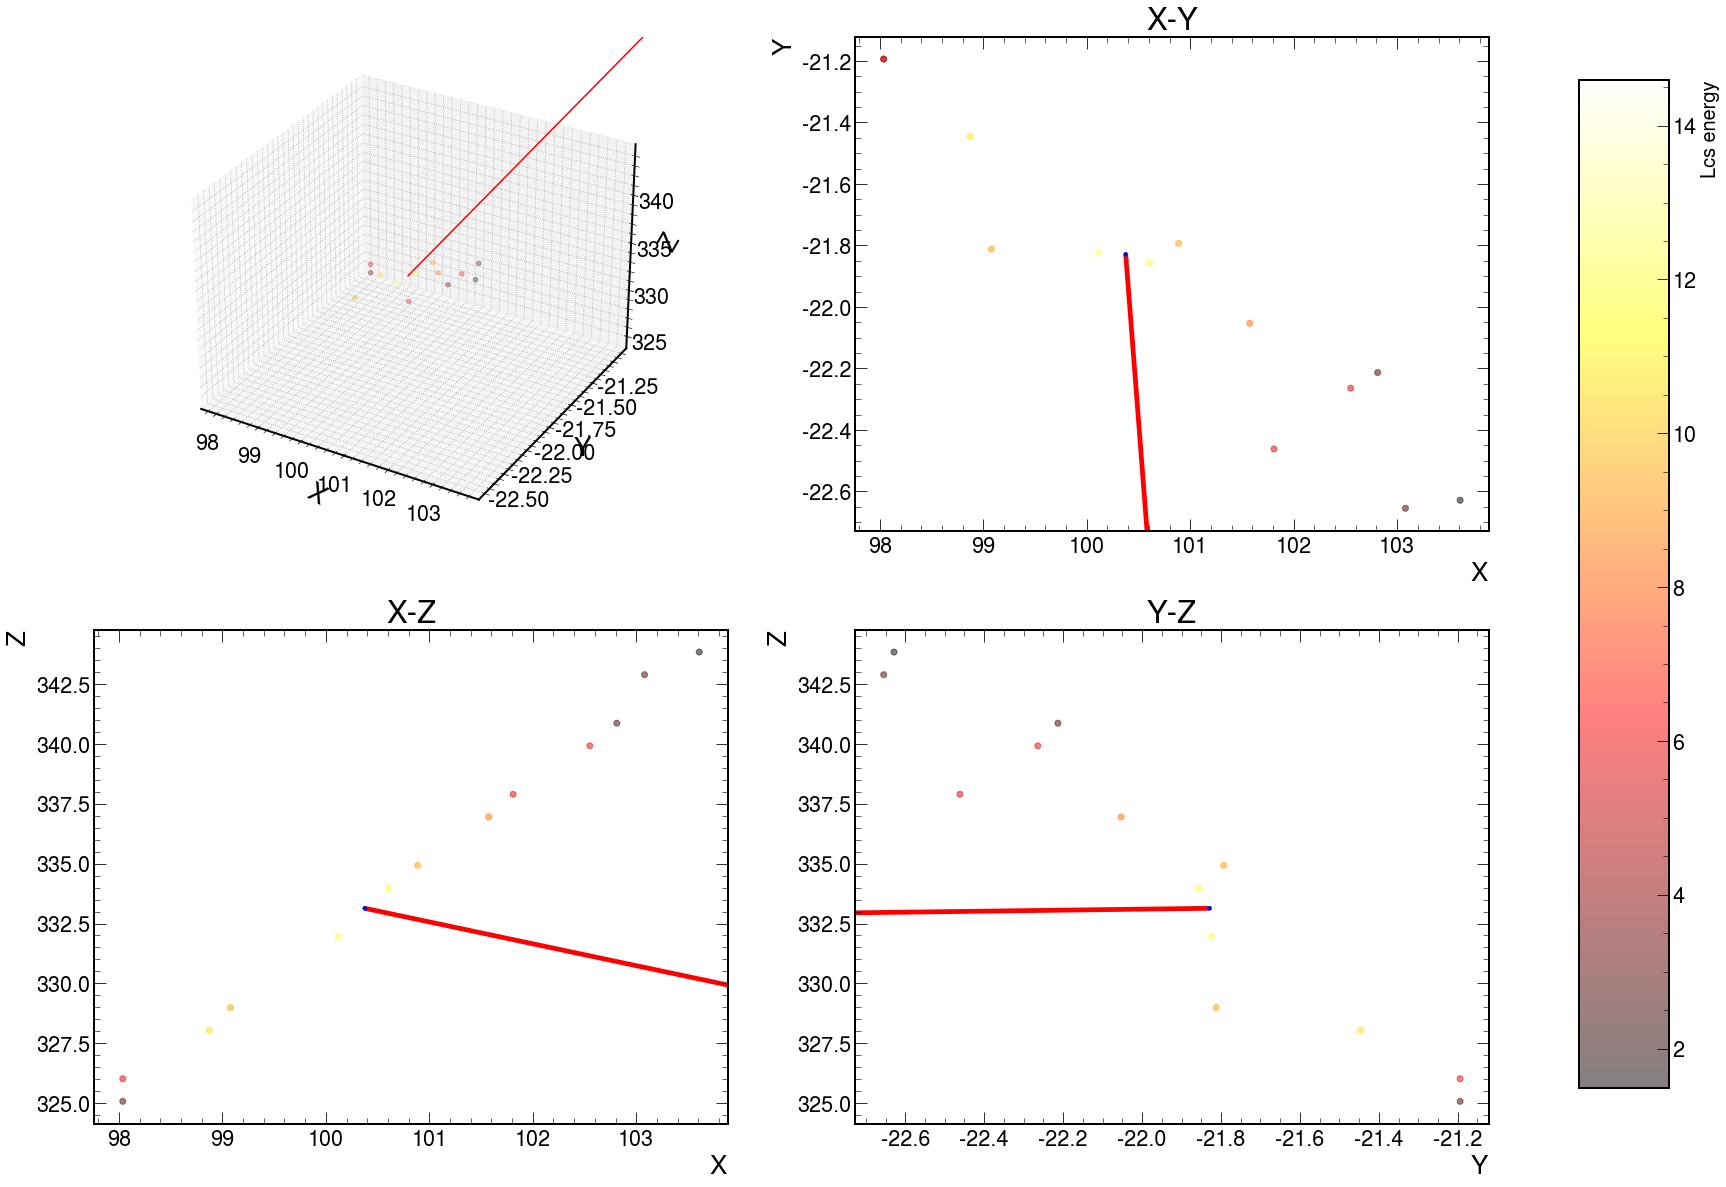

In [35]:
e_vecWLCF, e_valWLCF, covMWLCF, covMLCF, barycenterWLCF = runWPCA(3, dataLC_filtered.iloc[:, :3].values, dataLC_filtered.iloc[:,3].values, dataLC.iloc[:,3].values.sum())
plots(dataLC_filtered.values, barycenterWLCF, e_vecWLCF, e_valWLCF, noise = 0, save = "LCS_Weighted_Filtered", arrow_scale = 6)